In [17]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [4]:
sn000 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 0, combineFiles=True)
sn050 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 50, combineFiles=True)
sn100 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 100, combineFiles=True)
sn150 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 150, combineFiles=True)
sn200 = arepo.Snapshot(basepath + 'runs/MWiso_fg0.5_Z0/lvl4/output', 200, combineFiles=True)

In [11]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n
    

In [12]:
T050 = compute_T(sn050)
n050 = compute_n(sn050)
m050 = sn050.part0.mass.value

T100 = compute_T(sn100)
n100 = compute_n(sn100)
m100 = sn100.part0.mass.value

T150 = compute_T(sn150)
n150 = compute_n(sn150)
m150 = sn150.part0.mass.value

T200 = compute_T(sn200)
n200 = compute_n(sn200)
m200 = sn200.part0.mass.value

[(-6.0, 5.0), (1.0, 7.0)]

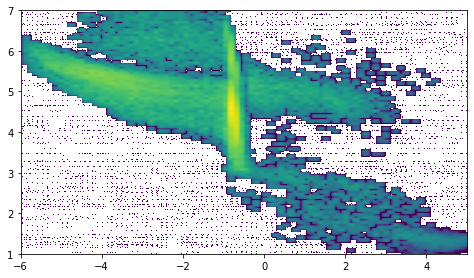

In [18]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n050), np.log10(T050), m050, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

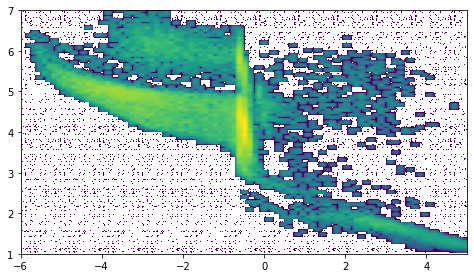

In [22]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n100), np.log10(T100), m100, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))


[(-6.0, 5.0), (1.0, 7.0)]

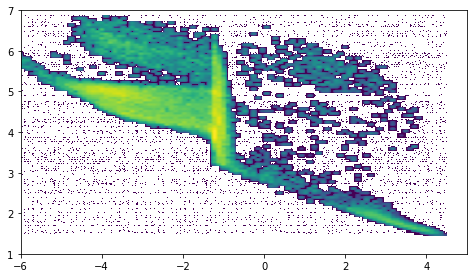

In [21]:
m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n200), np.log10(T200), m200, statistic='sum', bins=100)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(m_in_bin, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=(-6, 5), ylim=(1, 7))
